# Data Analysis for "6 facts you need to know about unicorns"

## Business understanding

This is the data analysis annex to "The 6 facts you need to know about unicorns" blog post. 

In this analysis, we will try to understand better some of the main characteristics of companies that have achieved valuations above 1 billion.

In particular, we will try to answer the following questions:

* How many unicorns are there?
* How has the number of unicorns evolved over the last years?
* What are the countries that produce the highest number of unicorns?
* What are the countries that actually have more unicorns?
* What are the industries that historically raise the most unicorns?
* How many years does it take to become a unicorn?

## Data understanding

In [126]:
#1. Load required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [94]:
#2. Load dataset

raw=pd.read_csv('src/Unicorn_Companies_1.csv')

In [95]:
#3. basic info about the columns
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1037 non-null   object
 1   Valuation ($B)     1037 non-null   object
 2   Date Joined        1037 non-null   object
 3   Country            1035 non-null   object
 4   City               1023 non-null   object
 5   Industry           1037 non-null   object
 6   Select Inverstors  1037 non-null   object
 7   Founded Year       1037 non-null   object
 8   Total Raised       1037 non-null   object
 9   Financial Stage    1037 non-null   object
 10  Investors Count    1037 non-null   object
 11  Deal Terms         1037 non-null   object
 12  Portfolio Exits    1037 non-null   object
dtypes: object(13)
memory usage: 105.4+ KB


In [96]:
#4. A glimpse to the dataset itself 

raw.head(15)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Carousell,$1.10,9/15/2021,Singapore,NaN,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent...",2012,$443M,None,16,7,None
1,Cider,$1,9/2/2021,Hong Kong,NaN,E-commerce & direct-to-consumer,"Andreessen Horowitz, DST Global, IDG Capital",2020,$131.46M,None,8,2,None
2,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
3,Faire,$12.40,10/30/2019,United States,San Francisco,Artificial intelligence,"Khosla Ventures, Forerunner Ventures, Sequoia ...",2017,$1.096B,None,14,6,None
4,Scale AI,$7.30,8/5/2019,United States,San Francisco,Artificial intelligence,"Accel, Y Combinator, Index Ventures",2018,None,None,1,None,None
5,Argo AI,$7.25,7/12/2019,United States,Pittsburgh,Artificial intelligence,"Volkswagen Group, Ford Autonomous Vehicles",2016,$500M,None,2,1,None
6,Gong,$7.25,8/12/2020,United States,Palo Alto,Artificial intelligence,"Norwest Venture Partners, Next World Capital, ...",2015,$583M,None,13,4,None
7,Automation Anywhere,$6.80,7/2/2018,United States,San Jose,Artificial intelligence,"General Atlantic, Goldman Sachs, New Enterpris...",2003,$840M,None,8,3,None
8,DataRobot,$6.30,7/29/2019,United States,Boston,Artificial intelligence,"New Enterprise Associates, Accomplice, IA Vent...",2012,$1.089B,None,36,7,None
9,6Sense,$5.20,3/30/2021,United States,San Francisco,Artificial intelligence,"Venrock, Battery Ventures, Insight Partners",2013,$424M,None,19,6,None


**Note**: It seems that the dataset mixes numeric and non-numeric elements in the same column, particularly in the columns related to financial data like "Valuation" and "Total Raised".

We will need to fix that in the next step of the analysis.

In [97]:
#5. Diagnosis of nas per variable
raw.isna().sum()

Company               0
Valuation ($B)        0
Date Joined           0
Country               2
City                 14
Industry              0
Select Inverstors     0
Founded Year          0
Total Raised          0
Financial Stage       0
Investors Count       0
Deal Terms            0
Portfolio Exits       0
dtype: int64

It seems like the dataset has very few NAs. We will analyze in the next step what are the NAs in "City" and if we need to handle them.

## Data Preparation

#### Missing values

In [286]:
# Revise what are the NAs in City
raw[raw['City'].isna()]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Valuation ($M),Total Raised clean
0,Carousell,1.10,2021-09-15,Singapore,NaN,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent...",2012.0,$443M,None,16,7,None,1100.0,443.00
1,Cider,1.00,2021-09-02,Hong Kong,NaN,E-commerce & direct-to-consumer,"Andreessen Horowitz, DST Global, IDG Capital",2020.0,$131.46M,None,8,2,None,1000.0,131.46
109,Ninja Van,1.00,2021-09-27,Singapore,NaN,"Supply chain, logistics, & delivery","B Capital Group, Monk's Hill Ventures, Dynamic...",2014.0,$976.5M,None,15,6,None,1000.0,976.50
225,Matrixport,1.05,2021-06-01,Singapore,NaN,Fintech,"Dragonfly Captial, Qiming Venture Partners, DS...",NaN,$126.55M,None,22,1,None,1050.0,126.55
669,Trax,1.30,2019-07-22,Singapore,NaN,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T...",2010.0,$1.013B,None,10,5,None,1300.0,1013.00
862,Moglix,2.60,2021-05-17,Singapore,NaN,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway",2015.0,$470.71M,None,16,6,None,2600.0,470.71
863,HyalRoute,3.50,2020-05-26,Singapore,NaN,Mobile & telecommunications,Kuang-Chi,2015.0,$263.12M,None,1,1,None,3500.0,263.12
901,bolttech,1.00,2021-07-01,Singapore,NaN,Fintech,"Mundi Ventures, Doqling Capital Partners, Acti...",2018.0,$502.2M,None,17,1,None,1000.0,502.20
958,WeLab,1.00,2017-11-08,Hong Kong,NaN,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene...",2013.0,$896M,None,13,3,None,1000.0,896.00
959,PatSnap,1.00,2021-03-16,Singapore,NaN,Internet software & services,"Sequoia Capital China, Shunwei Capital Partner...",2007.0,$352.32M,None,10,3,None,1000.0,352.32


The 14 NAs are from companies that actually don't have a city as they belong to city-states like Singapore or Hong Kong. I will replace those NAs with the same name of the country, but anyways the city column won't be used in the analysis.

In [287]:
raw.loc[raw['City'].isna(),'City']=raw.loc[raw['City'].isna(),'Country']

We have seen before that the features that should be numeric mix some strings. This happens as shown below when there is no data, as CB Insights reported the missing value with the word "None" 

In [98]:
raw['Founded Year'].value_counts()#None needs to be parsed as NA

2015    144
2014    105
2016    103
2012     87
2013     85
2011     76
2017     67
2018     55
None     41
2010     37
2019     34
2009     33
2008     23
2020     23
2007     23
2005     15
2006     13
2000     12
1999      8
2021      8
2004      8
2001      8
2003      7
1998      4
2002      3
1994      2
1992      2
1995      2
1996      1
1991      1
1919      1
1973      1
1979      1
1997      1
1993      1
1990      1
1984      1
Name: Founded Year, dtype: int64

Therefore, we replace "None" with NAs.

In [99]:
#replace None strings with NAs
raw['Founded Year']=raw['Founded Year'].replace('None',np.nan)

In [100]:
#parse dates

raw['Date Joined']=pd.to_datetime(raw['Date Joined'])

raw['Founded Year']=pd.to_numeric(raw['Founded Year'])

Numeric data mixes some string symbols like "$","M", and "B". We will remove them with regex. 

In [101]:
#Clean raised and valuation columns using a small regex
raw['Valuation ($B)']=raw['Valuation ($B)'].str.replace("[$]","").astype('float')
raw['Valuation ($M)']=raw['Valuation ($B)']*1000

We also have the issue of None in financial columns. IN this case, we replace by zeros rather than by NA, as raising no money means raising $0 dollars ;)

In [103]:
#Total raised column mixes numeric and strings
raw['Total Raised'].value_counts().sort_values(ascending=False)#there are 24 companies that didn't raise capital and reached the unicorn status, impressive!

None        24
$300M        9
$100M        5
$315M        4
$475M        4
            ..
$70.59M      1
$433M        1
$3.472B      1
$200.18M     1
$470.52M     1
Name: Total Raised, Length: 914, dtype: int64

In [115]:
#we clean Total Raised column using regex and replace the "none" string with zeros
billions=(raw['Total Raised'].str.contains('B')) #condition to subset billion quantities
millions=(raw['Total Raised'].str.contains('M'))
thousands=(raw['Total Raised'].str.contains('K'))
no_vc=(raw['Total Raised']=='None')

raw.loc[billions,'Total Raised clean']=raw.loc[billions,'Total Raised'].str.replace('[$B]','').astype('float')*1000

raw.loc[millions,'Total Raised clean']=raw.loc[millions,'Total Raised'].str.replace('[$M]','').astype('float')
raw.loc[thousands,'Total Raised clean']=raw.loc[thousands,'Total Raised'].str.replace('[$K]','').astype('float')/1000

raw.loc[no_vc,'Total Raised clean']=0


In [114]:
#Clean capitalization in Industry columns to improve readability in charts

raw['Industry']=raw['Industry'].str.capitalize()

In [290]:
#save a copy after finishing the clean up
clean=raw.copy()

Now, after fixing some of the hidden missing value, we can reassess the NAs:

In [294]:
clean.isna().sum()

Company                0
Valuation ($B)         0
Date Joined            0
Country                0
City                   0
Industry               0
Select Inverstors      0
Founded Year          41
Total Raised           0
Financial Stage        0
Investors Count        0
Deal Terms             0
Portfolio Exits        0
Valuation ($M)         0
Total Raised clean     0
dtype: int64

In [295]:
41/1037

0.03953712632594021

We only have 41 NAs in Founded Year. This represents approx. 4% of the column. 

I consider that I can't impute appropriately any date using the info from the others. If I impute the median or the mean of foundation, I will bias the bar plot for the years and time to become an unicorn analysis by pushing further all the distribution towards that value. 

For this reason, I will omit that small part of the sample in the analyses that require the Founded Year column.

## Evaluation

### How many unicorns are there?


In [119]:
#Calculate total number of observations and print result
print(f"There have been {clean['Company'].count()} unicorns in the last 40 years.")

There have been 1037 unicorns in the last 40 years.


### What have been the years with most unicorns?

Text(0.5, 1.0, 'Number of new unicorns per year')

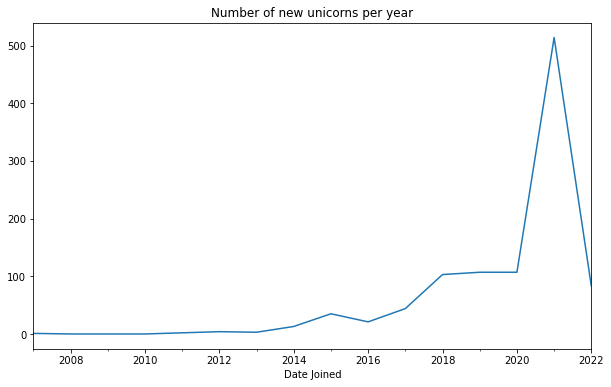

In [238]:
#We group by year using Date Joined to find the years with most unicorns
plt.figure(figsize=(10,6))

clean.groupby(pd.Grouper(key='Date Joined',freq='Y'))['Company'].nunique().plot()
plt.title('Number of new unicorns per year')

In [239]:
clean.groupby(pd.Grouper(key='Date Joined',freq='Y'))['Company'].nunique()

Date Joined
2007-12-31      1
2008-12-31      0
2009-12-31      0
2010-12-31      0
2011-12-31      2
2012-12-31      4
2013-12-31      3
2014-12-31     13
2015-12-31     35
2016-12-31     21
2017-12-31     44
2018-12-31    103
2019-12-31    107
2020-12-31    107
2021-12-31    514
2022-12-31     83
Freq: A-DEC, Name: Company, dtype: int64

 Evidently, the number of unicorns was quite low prior to 2018. However, between 18 and 20 it stabilized around 100 per year and exploded in 2021 for the reasons I explain in the article.

### What are the countries with most unicorns?

In [246]:
#I group the data by Country to calculate the number of companies per location and then plot
top_10=clean.groupby('Country')['Company'].nunique().sort_values(ascending=False).head(10).reset_index()

Text(0.5, 1.0, 'Number of unicorns per country')

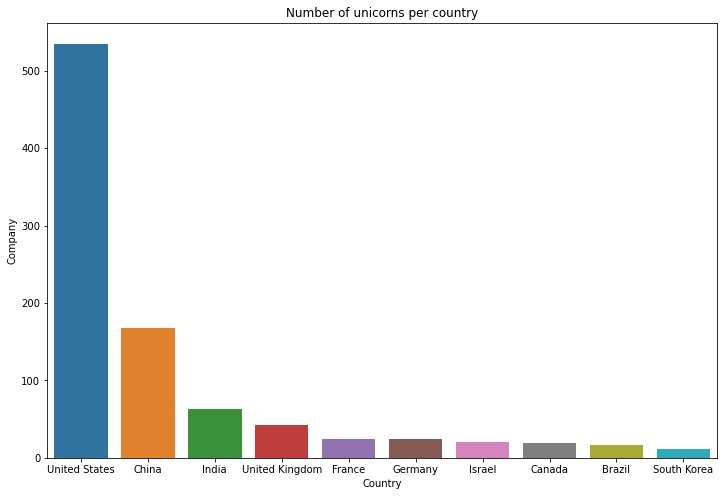

In [254]:
plt.figure(figsize=(12,8))
sns.barplot(data=top_10,x='Country',y='Company')
plt.title('Number of unicorns per country')

In [270]:
#printed this to see the exact numbers
clean.groupby('Country')['Company'].nunique().sort_values(ascending=False)

Country
United States           535
China                   168
India                    63
United Kingdom           42
France                   24
Germany                  24
Israel                   20
Canada                   19
Brazil                   16
South Korea              12
Singapore                11
Indonesia                 7
Sweden                    6
Netherlands               6
Mexico                    6
Australia                 6
Japan                     6
Switzerland               5
Hong Kong                 5
Ireland                   5
Norway                    4
United Arab Emirates      3
Turkey                    3
Spain                     3
Belgium                   3
Finland                   3
Denmark                   2
Colombia                  2
Chile                     2
Estonia                   2
Austria                   2
Vietnam                   2
Philippines               2
South Africa              2
Thailand                  2
Italy       

In [271]:
#Sum up the number of US, China and INdia companies
clean.groupby('Country')['Company'].nunique().sort_values(ascending=False).head(3).sum()

766

In [241]:
#Same data, but as percentages
clean.groupby('Country')['Company'].nunique().sort_values(ascending=False)/clean.groupby('Country')['Company'].nunique().sort_values(ascending=False).sum()

Country
United States           0.517408
China                   0.162476
India                   0.060928
United Kingdom          0.040619
France                  0.023211
Germany                 0.023211
Israel                  0.019342
Canada                  0.018375
Brazil                  0.015474
South Korea             0.011605
Singapore               0.010638
Indonesia               0.006770
Sweden                  0.005803
Netherlands             0.005803
Mexico                  0.005803
Australia               0.005803
Japan                   0.005803
Switzerland             0.004836
Hong Kong               0.004836
Ireland                 0.004836
Norway                  0.003868
United Arab Emirates    0.002901
Turkey                  0.002901
Spain                   0.002901
Belgium                 0.002901
Finland                 0.002901
Denmark                 0.001934
Colombia                0.001934
Chile                   0.001934
Estonia                 0.001934
Au

*Comment*: Clearly, US, China and India represent the countries with most unicorns. However those also happen to be the countries with largest population, and hence we should also try to see the data considering the population size.

### What are the countries that actually produce more unicorns?


I will install the WB package, and define a function that retrieves and cleans the requested dataset. 
Using that function, I request the population data set 'SP.POP.TOTL' and merge it with our unicorn data by country to calculate rates per million population.

In [141]:
#We need to install the package that connects to World Bank's World Development INdicators data to download population data
!pip install world_bank_data --upgrade

  Created wheel for world-bank-data: filename=world_bank_data-0.1.3-py3-none-any.whl size=11095 sha256=0ec8b8ba8ef7b89a544e957aa93f6d80a6f8d48f232a195ce537e1e271e2cbb9
  Stored in directory: /Users/juansebastianfranco/Library/Caches/pip/wheels/fe/17/0c/9ef630351acc5856f4a1814d96bc082eccf1cbbb779fcd1a98
Successfully built world-bank-data


We define a function "retrieve_clean_wb" to request the data we need for the analysis.

In [298]:
import world_bank_data as wb

def retrieve_clean_wb(dataset,name_variable):
    
    """Descr: Retrieves the requested dataset using the WB API and returns it after cleaning variable names.
    INPUT:
    dataset: The name of the dataset requested following WB nomenclature (see world_bank_data documentation)
    name_variable: Name to be used for the outcome variable
    OUTPUT:
    aux: a dataframe containing the requested dataset by country.
    
    
    """
    aux=wb.get_series(dataset, mrv=1,simplify_index=True).reset_index()
    aux=aux.rename(columns={dataset:name_variable})
    replace_names={'Bahamas, The':'Bahamas','Korea, Rep.':'South Korea','Hong Kong SAR, China':'Hong Kong'}
    aux['Country']=aux['Country'].replace(replace_names)
    return aux


In [300]:
#Use the function to get the clean dataset
world_pop=retrieve_clean_wb('SP.POP.TOTL','total_pop')

In [173]:
#Calculate unicorn country aggregates and merge with WB data
country_data=clean.groupby('Country')['Company'].nunique().reset_index().merge(world_pop,how='left',on='Country')

In [175]:
#Calculate rate per 1M pop.
country_data['unicorns_per_1m']=country_data['Company']*1000000/country_data['total_pop']

In [302]:
#Print the result to see what can we find
country_data.sort_values('unicorns_per_1m',ascending=False)

,Country,Company,total_pop,unicorns_per_1m
5,Bermuda,1,6.390300e+04,15.648718
3,Bahamas,1,3.932480e+05,2.542925
22,Israel,20,9.216900e+06,2.169927
34,Singapore,11,5.685807e+06,1.934642
44,United States,535,3.294841e+08,1.623750
26,Luxembourg,1,6.322750e+05,1.581590
14,Estonia,2,1.331057e+06,1.502565
21,Ireland,5,4.994724e+06,1.001056
31,Norway,4,5.379475e+06,0.743567
18,Hong Kong,5,7.481800e+06,0.668288


As I explain in the article, it is quite unusual to see Bermuda and the Bahamas heading this list. We will investigate what are those companies and use some Google searches to see if the do belong to those countries.

In [256]:
#What are the Bermuda and Bahamas companies that bias the data??
clean[clean['Country'].isin(['Bermuda','Bahamas'])]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Valuation ($M),Total Raised clean,year_diff,years_to_unicorn
38,Afiniti,1.6,2017-04-14,Bermuda,Hamilton,Artificial intelligence,GAM Holding,2006.0,$327.2M,None,10,3,None,1600.0,327.2,4121 days,11.282683
960,FTX,32.0,2021-07-20,Bahamas,NaN,Fintech,"Sequoia Capital, Thoma Bravo, Softbank",2018.0,$1.829B,Acq,40,3,1,32000.0,1829.0,1296 days,3.548255


As I state in the article, I don't think those two are companies from those countries. Those are actually american companies that were moved to those islands due to legal or tax regulations. 

For this reason, I remove them from the chart.

In [262]:
#Top 10 removing Bermuda and Bahamas for the reasons explained in the article
top10_1m=country_data[~country_data['Country'].isin(['Bermuda','Bahamas'])].sort_values('unicorns_per_1m',ascending=False).head(10)

Text(0, 0.5, 'Unicorns per 1M pop.')

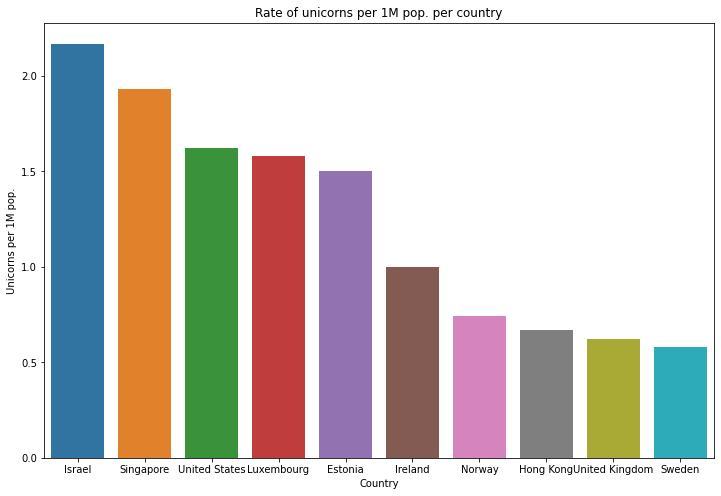

In [303]:
#Plot Top 10 after removing those two countries
plt.figure(figsize=(12,8))
sns.barplot(data=top10_1m,x='Country',y='unicorns_per_1m')
plt.title('Rate of unicorns per 1M pop. per country')
plt.ylabel('Unicorns per 1M pop.')

As shown in the chart, Israel, Singapore and the US are the technological powerhouses in the world after taking population into consideration. As I mention in the text, those countries have extraordinary expenditures in research and development as % of GDP and hence is no surprise that they also have highly skilled populations.

### What are the industries with most unicorns?

Now we group the data by industry and by year to find trends.

In [273]:
#Group by industry
by_industry=clean.groupby('Industry')['Company'].nunique().sort_values(ascending=False).reset_index()

In [276]:
#Calculate percentage from the total number of companies
by_industry['percentage']=by_industry['Company']*100/by_industry['Company'].sum()

In [304]:
#Print the results
by_industry

,Industry,Company,percentage
0,Fintech,212,20.443587
1,Internet software & services,194,18.707811
2,E-commerce & direct-to-consumer,111,10.703954
3,Artificial intelligence,80,7.714561
4,Health,69,6.653809
5,"Supply chain, logistics, & delivery",58,5.593057
6,Other,56,5.400193
7,Cybersecurity,49,4.725169
8,Data management & analytics,41,3.953713
9,Mobile & telecommunications,38,3.664417


In [285]:
#I save this table as a csv to upload it as a GitHub gist for better readability in Medium
by_industry.to_csv('industry.csv',index=False)

Fintech and internet services seem to be the strongest industries regarding number of unicorns. But has this been stable in time?

To answer that, we group the data by year and by industry and plot some time series to find out.

In [305]:
#Group data by year and industry for top 5 industries and then plot them as time series.
top_5=clean.groupby('Industry')['Company'].nunique().sort_values(ascending=False).head(5).index
year_df_top5=clean[clean['Industry'].isin(top_5)].groupby(['Industry',pd.Grouper(key='Date Joined',freq='Y')])['Company'].nunique().reset_index()


Text(0.5, 1.0, 'Number of new unicorns by industry by year')

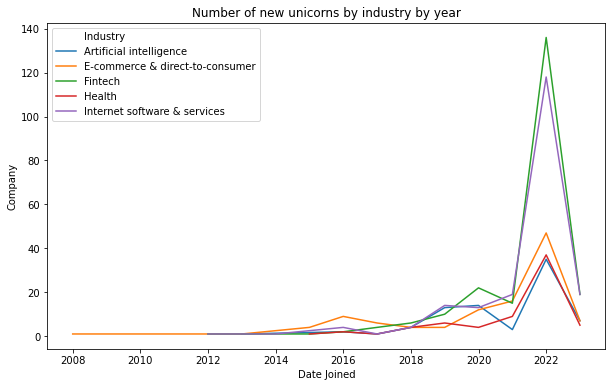

In [278]:
#Plot the data
plt.figure(figsize=(10,6))
sns.lineplot(data=year_df_top5,x='Date Joined',y='Company',hue='Industry')
plt.title('Number of new unicorns by industry by year')

I think that the most interesting finding here is how e-commerce lost its position as the indutry with more unicorns. Before 2018, it seemed to be a hot place to receive investors funds, but from 2019 fintech and internet services got into the first places for the reasons I explain in the article.

### Years to become a unicorn

Here we will examine the distribution of the number of years needed to become an unicorn.

As I mentioned in the data cleaning section, I will omit 4% of the observations for this analysis as those don't have the foundation date and I think that it is not credible to guess it using imputation methods.

In [307]:
#Calculate time in years since inception. NAs are dropped to be able to calculate the difference
clean['year_diff']=clean['Date Joined']-pd.to_datetime(clean['Founded Year'].dropna().astype(int).astype(str)+'-01-01')

In [308]:
#Convert days to years dividing by 365.25
clean['years_to_unicorn']=clean['year_diff']/datetime.timedelta(days=365.25)

Text(0.5, 1.0, 'Distribution of years to become a unicorn')

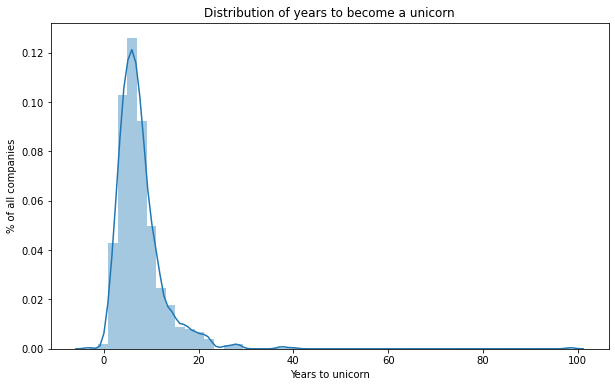

In [309]:
#Plot the distribution
plt.figure(figsize=(10,6))
sns.distplot(clean['years_to_unicorn'])
plt.xlabel('Years to unicorn')
plt.ylabel('% of all companies')

plt.title('Distribution of years to become a unicorn')

From the distribution, we can see that most unicorns needed between 6 and 8 years. However, we can also see that there are some interesting outliers that needed more than 20 and even a company that took 100 years to become one. I tell a bit of the story behind that company in the text.

In [310]:
#Get some basic stats of the distribution to have more clarity
(clean['year_diff']/datetime.timedelta(days=365.25)).describe()

count    996.000000
mean       7.611453
std        5.527183
min       -3.208761
25%        4.494867
50%        6.518823
75%        9.074606
max       98.477755
Name: year_diff, dtype: float64

In the following cells I explore what are the companies that needed more than 20 years and inspect what was the company that needed 100 years to become a unicorn.

In [225]:
#Companies that required more than 20 years to become unicorns
clean[clean['years_to_unicorn']>20]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Valuation ($M),Total Raised clean,year_diff,years_to_unicorn
28,Avant,2.00,2012-12-17,United States,Chicago,Artificial intelligence,"RRE Ventures, Tiger Global, August Capital",1973.0,$1.73B,None,14,6,None,2000.0,1730.00,14595 days,39.958932
121,Promasidor Holdings,1.59,2016-11-08,South Africa,Bryanston,Consumer & retail,"IFC, Ajinomoto",1979.0,$556M,None,2,1,None,1590.0,556.00,13826 days,37.853525
169,Venafi,1.15,2020-12-10,United States,Salt Lake City,Cybersecurity,"Pelion Venture Partners, Foundation Capital, T...",2000.0,$174M,None,13,4,None,1150.0,174.00,7649 days,20.941821
170,eSentire,1.10,2022-02-22,Canada,Waterloo,Cybersecurity,"Edison Partners, Georgian Partners, VentureLink",2001.0,$287.88M,None,12,2,None,1100.0,287.88,7722 days,21.141684
196,Starburst,3.35,2021-01-06,United States,Boston,Data management & analytics,"Index Ventures, Coatue Management, Andreessen ...",1999.0,None,None,1,None,None,3350.0,0.00,8041 days,22.015058
222,Fractal Analytics,1.00,2022-01-05,India,Mumbai,Data management & analytics,"TPG Capital, Apax Partners, TA Associates",2000.0,$688M,None,6,3,None,1000.0,688.00,8040 days,22.012320
382,National Stock Exchange of India,6.50,2020-07-01,India,Mumbai,Fintech,"TA Associates, SoftBank Group, GS Growth",1992.0,$149.5M,IPO,7,1,1,6500.0,149.50,10409 days,28.498289
387,Pine Labs,6.00,2020-01-24,India,Noida,Fintech,"Sequoia Capital India, Temasek, PayPal Ventures",1998.0,$1.077B,None,25,6,None,6000.0,1077.00,8058 days,22.061602
418,BGL Group,3.00,2017-11-24,United Kingdom,Peterborough,Fintech,CPP Investment Board,1992.0,$900M,Divestiture,1,1,1,3000.0,900.00,9459 days,25.897331
447,Earnix,2.00,2021-02-21,Israel,Giv'atayim,Fintech,"Jerusalem Venture Partners, Israel Growth Part...",2001.0,$98.5M,None,6,2,None,2000.0,98.50,7356 days,20.139630


In [311]:
#OttoBocks interesting case. I extract the observation with the highest number in the years to become unicorn variable
clean[clean['years_to_unicorn']==clean['years_to_unicorn'].max()]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Valuation ($M),Total Raised clean,year_diff,years_to_unicorn
616,Otto Bock HealthCare,3.52,2017-06-24,Germany,Duderstadt,Health,EQT Partners,1919.0,$815.49M,None,2,1,None,3520.0,815.49,35969 days,98.477755


Otto Bock took 99 years to reach the unicorn status, in the article a tell some of that story!